## 1. Finch beaks and the need for statistics
You are now carrying a well-stocked toolbox.
### 1.1. Theory.
#### Your well-equipped toolbox
You know how to take a data set and explore it. You know how to think probabilistically and infer values and confidence intervals for parameters. And you know how to formulate a hypothesis and use your data, and Python, to test it. Let's put those tools to use! 

In this chapter, you will immerse yourself in what is in my opinion one of the most fascinating data sets out there.

You may know that many of the important observations that led Charles Darwin to develop the theory of evolution were made in the Galápagos archipelago, particularly in the study of the small birds, called finches, that inhabit them. 

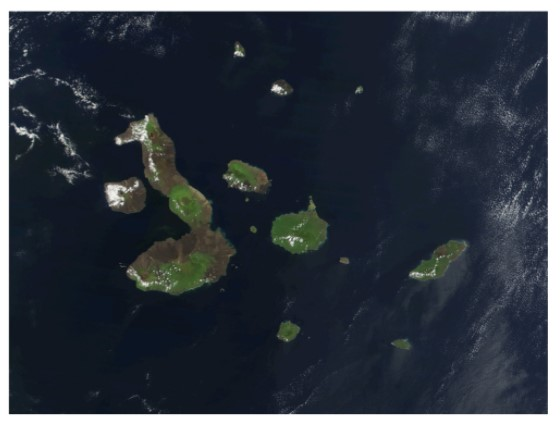

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

The islands are ideal for studying evolution because they are isolated so they do not have complicated effects from interactions with other species including humans.

Furthermore, some of them are small, so entire populations can be monitored on a given island. 

Every year since 1973, Peter and Rosemary Grant of Princeton University have been spending several months of the year on the tiny volcanic cinder cone island of Daphne Major in the Galápagos.

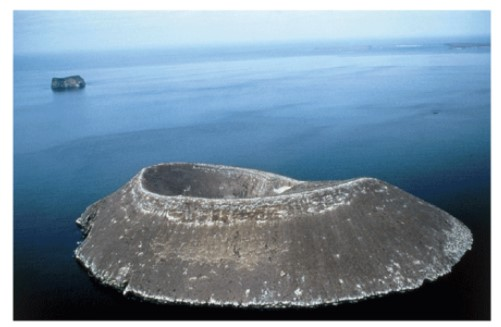

In [2]:
## Hình minh họa Image(fig1, height, width)

#### The finches of Daphne Major
This island has two dominant ground finch species, Geospiza fortis and Geospiza scandens. The Grants have monitored them every year, tagging them, making physiological measurements, taking samples for genetic sequencing, and more. 

In 2014, they published a book entitled `"40 Years of Evolution: Darwin's Finches on Daphne Major Island"`. They generously placed all of their data on the Dryad data repository making it free for anyone to use. The data set is impressive and a great set for using data science and statistical inference to learn about evolution.

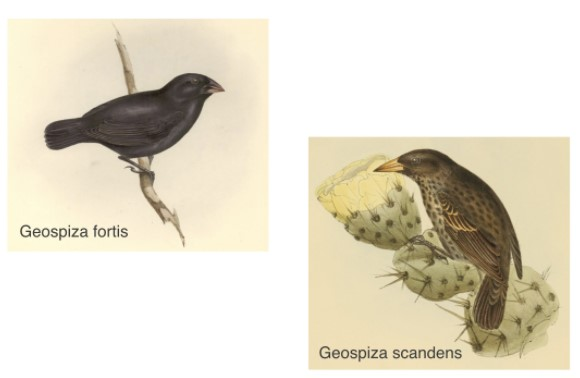

In [3]:
## Hình minh họa Image(fig1, height, width)

#### The dimensions of the finch beak
You will work with the Grants' measurements of the beak length and beak depth. 

You will consider different aspects of the beak geometry, including how it varies over time, from species to species, and from parents to offspring. 

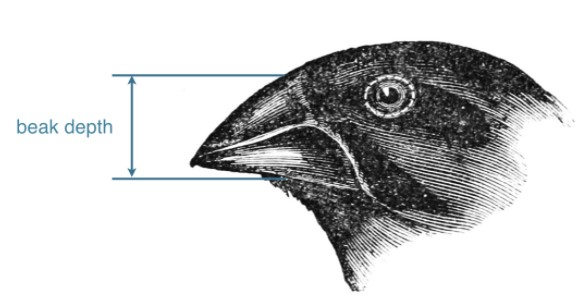

In [4]:
## Hình minh họa Image(fig1, height, width)

#### Investigation of G. scandens beak depth.
For your first analysis, you will investigate how the beak depth of Geospiza scandens has changed over time.
- You will start with some exploratory analysis of the measurements of these species from 1975 and 2012.
- You will then perform a parameter estimation, with confidence intervals, of mean beak depth for those respective years. 
- Finally, you will do a hypothesis test investigating if the mean beak depth has changed from 1975 to 2012.

### 1.2. PRACTICES
#### Exercise 1.2.1. EDA of beak depths of Darwin's finches
For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

#### SOLUTION.
**Step 1.** Establish dataset that the data are stored in a `pandas DataFrame` called `df` with columns `'year'` and `'beak_depth'`. The units of beak depth are millimeters (mm).

In [5]:
import numpy as np
import pandas as pd
df_1975 = pd.read_table(r'../input/think-stats-dataset/Finch beaks (1975).txt',
                    sep = ',', usecols = ['species', 'Beak depth, mm', "Beak length, mm"])
df_2012 = pd.read_table(r'../input/think-stats-dataset/Finch beaks (2012).txt',
                    sep = ',', usecols = ['species', 'bdepth', "blength"])
df_1 = df_1975[df_1975['species'] == 'scandens']
df_2 = df_2012[df_2012['species'] == 'scandens']
year = [1975]*len(df_1) + [2012]*len(df_2)
b_depth = np.concatenate([df_1['Beak depth, mm'].values, 
                          df_2['bdepth'].values ])
df = pd.DataFrame({'year': year, 'beak_depth': b_depth})
df.head()

,year,beak_depth
0,1975,8.4
1,1975,8.8
2,1975,8.4
3,1975,8.0
4,1975,7.9


**Step 2.**

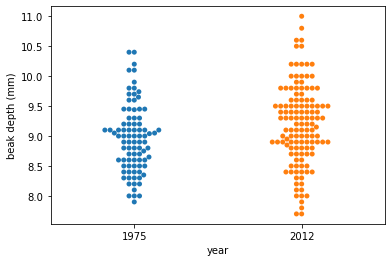

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create bee swarm plot
_ = sns.swarmplot(x='year', y = 'beak_depth', data = df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

#### Exercise 1.2.2. ECDFs of beak depths
While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.
#### SOLUTION
**Step 1.** For your convenience, the beak depths for the respective years will be stored in the `NumPy` arrays `bd_1975` and `bd_2012`.

In [7]:
# Load from the df_1975 and df_2012 in the previous exercise
bd_1975 = df_1['Beak depth, mm'].values
bd_2012 = df_2['bdepth'].values

**Step 2.** Re-write / recall the function `ecdf()`

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

**Step 3.**

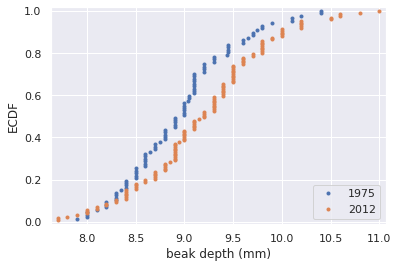

In [9]:
sns.set()

# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

**Comments.** The mean is larger in the 2012 data, and the variance does appear larger as well.
#### Exercise 1.2.3. Parameter estimates of beak depths
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.
#### SOLUTION.
**Step 1.** Rewrite the function `draw_bs_reps()` that you 've wrote in [chapter 2](),

In [10]:
def bootstrap_replicate_1d(data, func):
    """Generare boostrap replicate of 1D-data"""
    bs_sample = np.random.choice(data, size = len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

**Step 2.**

In [11]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975) 

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size = 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size = 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06230111 0.38913397] mm


#### Exercise 1.2.4. Hypothesis test: Are beaks deeper in 2012?
Your plot of the `ECDF` and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.
#### SOLUTION

In [12]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, size = 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, size = 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value (mean_diff is still stored in the previous exercise)
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0023


#### Comments.
- We get `a p-value` is about of `0.003`, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! 
- In the previous exercise, you got a difference of `0.2 mm` between the means. 
- You should combine this with the statistical significance. 
- **Changing by 0.2 mm in 37 years is substantial by evolutionary standards.** If it kept changing at that rate, the beak depth would double in only 400 years.

## 2. Variation in beak shapes
### 2.1. Theory.
You just determined that the beak depth of Geospiza scandens changed over the course of 37 years. There are a few hypotheses as to why this is the case.

One reason may be a drought in 1976 and 1977 that resulted in the death of the plants that produce small seeds on the island.
#### The drought of winter 1976/1977.
- The larger seeds required deeper beaks to crack them, so large-beaked birds survived and then reproduced. 
- If this is the case, it stands to reason that the length of the beak might also change over time. 

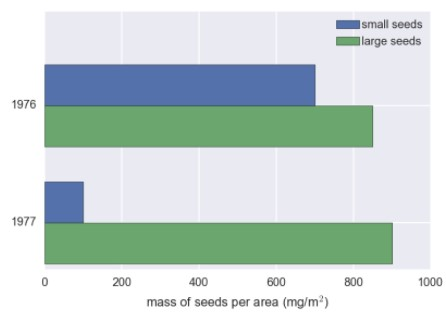

In [13]:
## Hình minh họa Image(fig1, height, width)

#### Beak geometry
Importantly, if the length and depth change at the same rate, the beak has the same shape; it just gets bigger. But if the beak length and beak depth change differently, the shape of the beak changes. 

In the next few exercises, you will investigate how beak length and depth change together.

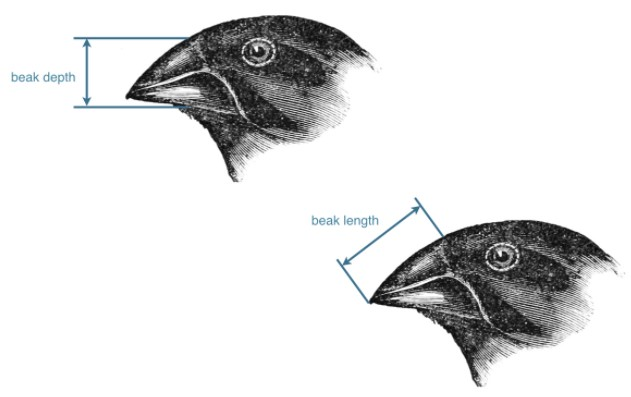

In [14]:
## Hình minh họa Image(fig1, height, width)

That means it's time for some linear regression! 

As a hint, the `draw_bs_pairs_linreg` function you wrote will be helpful in computing confidence intervals this of your linear regression parameters.

### 2.2. PRACTICE
First of all, we must store the new 2 `numpy-array` named `bl_1975` and `bl_2012`

In [15]:
# Load from the df_1975 and df_2012 in the previous exercise
bl_1975 = df_1['Beak length, mm'].values
bl_2012 = df_2['blength'].values

#### Exercise 2.2.1. EDA of beak length and depth
The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth `(y-axis)` versus beak length `(x-axis)` for the 1975 and 2012 specimens.
#### SOLUTION.

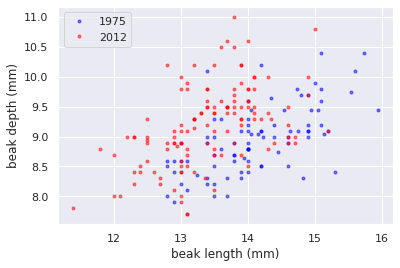

In [16]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='None', color = 'blue', alpha = 0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
            linestyle='None', color = 'red', alpha = 0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

**Comment.**  

In looking at the plot, we see that 
- beaks got **deeper** (the `red points` are `higher up` in the `y-direction`), 
- **but** *`not really longer`*. 

If anything, they got a bit shorter, since the red dots are to the left of the blue dots. 

So, it does not look like the beaks kept the same shape; they became shorter and deeper.

#### Exercise 2.2.2. Linear regressions
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report `95%` confidence intervals on the slope and intercept of the regression line.

You will use the `draw_bs_pairs_linreg()` function you wrote back in [chapter 2](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Testing%20Hypothesis/Statistical%20Thinking/Bootstrap%20confidence%20intervals.ipynb).

In [17]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        # Resample the indices inds.
        bs_inds = np.random.choice(inds, size=len(x))
        # Make new  and  arrays bs_x and bs_y using the the resampled indices bs_inds.
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        # Find slope & intercept for linear-regression
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg = 1)

    return bs_slope_reps, bs_intercept_reps

As a reminder, its call signature is `draw_bs_pairs_linreg(x, y, size=1)`, and it returns `bs_slope_reps` and `bs_intercept_reps`. The `beak length` data are stored as `bl_1975` and `bl_2012`, and the beak depth data is stored in `bd_1975` and `bd_2012`.

#### SOLUTION.

In [18]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, deg = 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, deg = 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, size = 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, size = 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.46520516916059335 conf int = [0.32569679 0.59425293]
1975: intercept = 2.390875236584224 conf int = [0.56187304 4.34593412]
2012: slope = 0.462630358835314 conf int = [0.33591674 0.60249527]
2012: intercept = 2.9772474982360064 conf int = [1.12716856 4.66933911]


#### Exercise 2.2.3. Displaying the linear regression results
Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. 

To do this, take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`.
#### SOLUTION.

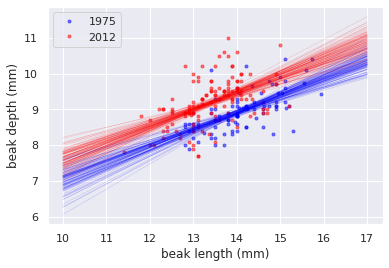

In [19]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, x * bs_slope_reps_1975[i] + bs_intercept_reps_1975[i] ,
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, x * bs_slope_reps_2012[i]  + bs_intercept_reps_2012[i] ,
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

#### Exercise 2.2.4. Beak length to depth ratio
The linear regressions showed interesting information about the beak geometry. 
- The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. 
- However, if we are interested in the shape of the beak, we want to compare the ratio of `beak length` to `beak depth`. 

Let's make that comparison.

Remember, the data are stored in `bd_1975`, `bd_2012`, `bl_1975`, and `bl_2012`.
#### SOLUTION.

1975: mean ratio = 1.5788823771858533 conf int = [1.55612984 1.60046494]
2012: mean ratio = 1.4658342276847767 conf int = [1.44382545 1.48806437]


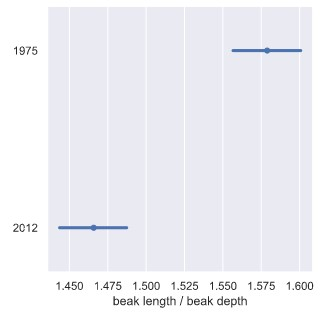

In [20]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size= 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size= 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

## Hình minh họa Image(fig1, height, width)

#### Comments. How different is the ratio?
From this result, you computed the mean beak length to depth ratio with `99% confidence intervals` for 1975 and for 2012. 

The results of that calculation are shown graphically in the plot accompanying this problem. In addition to these results, we can state that : **The mean beak length-to-depth ratio decreased by about `0.1`, or `7%`, from `1975` to `2012`. The `99%` confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.**

## 3. Calculation of heritability
What is causing the beaks of Geospiza scandens to get bigger over time? I mentioned the selective pressure brought on by the drought. But why do some birds have such large beaks to begin with? A prevailing explanation is that scandens birds are mating the other major finch species on Daphne Major, Geopsiza fortis.
### 3.1. Theory.
#### The finches of Daphne Major
These hybrid birds then mate with pure scandens, in a process called introgressive hybridization, which can bring fortis characteristics into the scandens species. This is similar to what likely happened to humans when they encountered neanderthals. 

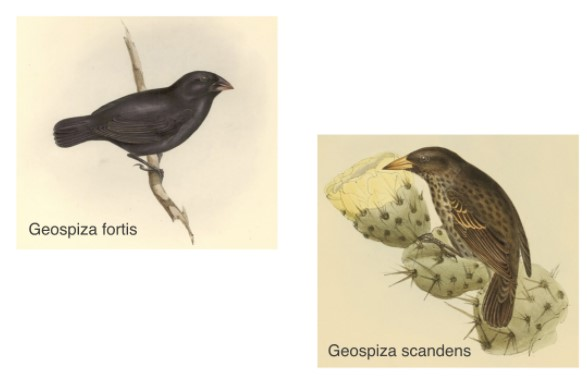

In [21]:
## Hình minh họa Image(fig1, height, width)

#### Heredity
In order assess the viability of this explanation, we need to know how strongly parental traits are passed on to offspring. 

In this last set of exercises, we will investigate the extent to which parental beak depth is inherited by offspring in both scandens and fortis. You are applying your new statistical skills to a real, fundamental scientific problem.

### 3.2. PRACTICES
#### Exercise 3.2.1. EDA of heritability
The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. 

The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from `G. fortis` birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.
#### SOLUTION.

In [22]:
dat = pd.DataFrame({'parent': bd_par_for, 'offspring': bd_off_for})
dat.to_csv('Fortis_beak.csv')

## Xoa tat ca dong tren
bd_fortis = pd.read_csv('Fortis_beak.csv')
bd_parent_fortis = bd_fortis['parent']
bd_offspring_fortis = bd_fortis['offspring']

In [23]:
bd_scand = pd.read_table(r'../input/think-stats-dataset/Scandens beak depth heredity.txt', sep = ',')
bd_parent_scandens = bd_scand['mid_parent'].values
bd_offspring_scandens = bd_scand['mid_offspring'].values

#### Step 2.

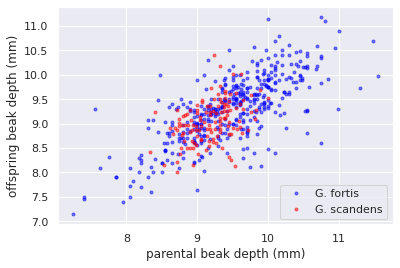

In [24]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

**Comments**

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

#### Exercise 3.2.2.  Correlation of offspring and parental data
In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interest is computed by calling `func(bs_x, bs_y)`. In the next exercise, you will use `pearson_r` for func.
#### SOLUTION

In [25]:
def pearson_r(x, y):
    return np.corrcoef(x, y)[0,1]

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        # Randomly choose indices from the array of indices you previously set up.
        bs_inds = np.random.choice(inds, size = len(inds))
        
        # Extract x values and y values from the input array
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        # Compute the statistic of interest from the bootstrap samples
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

#### Exercise 3.2.3. Pearson correlation of offspring and parental data
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

Remember, the data are stored in `bd_parent_scandens`, `bd_offspring_scandens`, `bd_parent_fortis`, and `bd_offspring_fortis`.
#### SOLUTION.

In [27]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, 
                                       bd_offspring_scandens, 
                                       pearson_r, size = 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, 
                                     bd_offspring_fortis, 
                                     pearson_r, size = 1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294012586 [0.26591764 0.53572399]
G. fortis: 0.7283412395518492 [0.66548819 0.78237648]


**Comments.**

It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

#### Exercise 3.2.4. Measuring heritability
Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

#### SOLUTION.

In [28]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0, 1] / covariance_matrix[0, 0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, size = 1000)

# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685983 [0.33808889 0.74377293]
G. fortis: 0.7229051911438154 [0.64522286 0.79848717]


**Comments.**

Here again, we see that G. fortis has stronger heritability than G. scandens. 

This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

#### Exercise 3.2.5. Is beak depth heritable at all in G. scandens?
The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.
#### SOLUTION.

In [29]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)

    # Compute the heritability between the permuted array and the bd_offspring_scandens array
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


**Comments.**

You get a `p-value` of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. 

This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. 

If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.